# Visualising the data

We use different dimension reduction techniques to visualise the data. 

### Import useful libraries and load data

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
path = '/Users/louispht/Dropbox/git_projects/news_classifier/Data cleaning/Pickles/'

# Dataframe
with open(path + 'df_all_noact.pickle', 'rb') as data:
    df_all = pickle.load(data)

# features_train
with open(path + 'features_train_noact.pickle', 'rb') as data:
    features_train = pickle.load(data)

# y_train
with open(path + 'y_train_noact.pickle', 'rb') as data:
    y_train = pickle.load(data)

# features_test
with open(path + 'features_test_noact.pickle', 'rb') as data:
    features_test = pickle.load(data)

# y_test
with open(path + 'y_test_noact.pickle', 'rb') as data:
    y_test = pickle.load(data)

### Dimensionality reduction plots

We use PCA and t-SNE to visualise the observations in 2 dimensions. 

We unify training and test sets. 

In [7]:
print(features_train.shape)
print(features_test.shape)
print(y_train.shape)
print(y_test.shape)

(8641, 500)
(1130, 500)
(8641,)
(1130,)


In [8]:
features = np.concatenate((features_train,features_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)

In [10]:
print(features.shape)
print(y.shape)

(9771, 500)
(9771,)


We put the visualisation process in a definition. 

In [20]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label']

    # Get labels name
    category_names = {0:'affaires', 3:'sports', 2:'international', 1:'culture'}

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "royalblue", "greenyellow", "lightseagreen"],
                    alpha=.7).set_title(title);

#### PCA

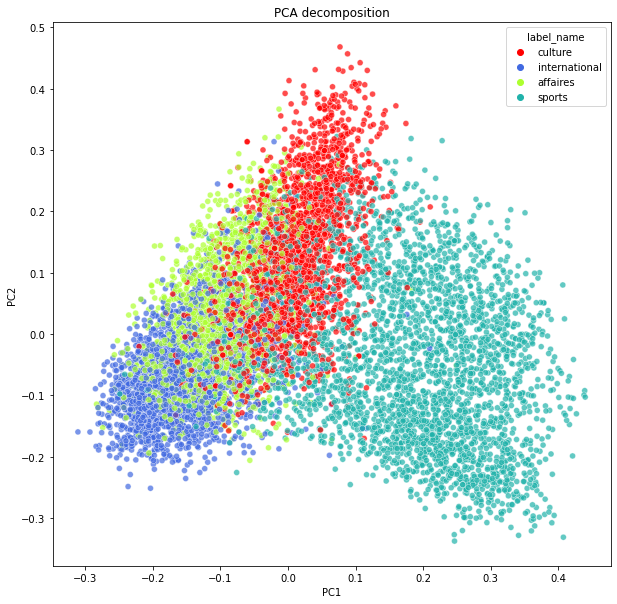

In [21]:
plot_dim_red("PCA", 
             features=features, 
             labels=y,
             n_components=2)

#### t-SNE

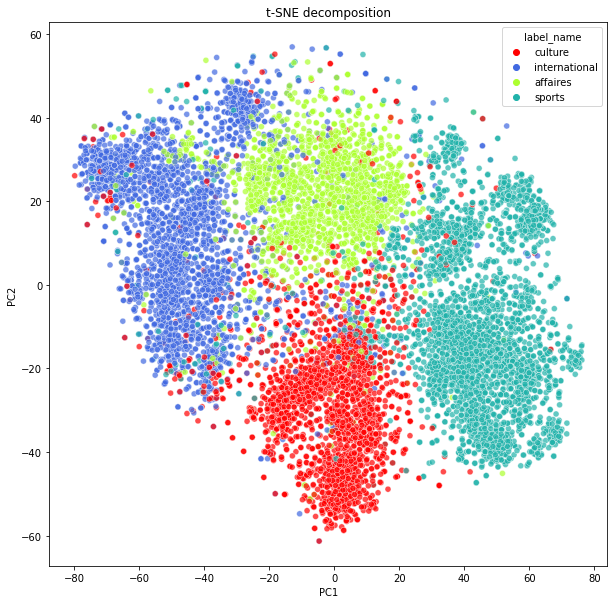

In [25]:
plot_dim_red("TSNE", 
             features=features, 
             labels=y,
             n_components=2)

Both graphs show that it seems harder to separate 'culture', at least after reducing the dimension to 2. 